<a href="https://colab.research.google.com/github/Ruvindya/Machine-Learning/blob/main/Unsupervised_Learning__Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Unsupervised Learning

K-means clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = pd.read_csv(url, names=names)


In [3]:
iris_data

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In K-means clustering, it is not necessary to convert the class column into numerical data. K-means clustering is an unsupervised learning algorithm that operates solely on numerical features. It aims to group similar data points together based on their feature values.

In [5]:
# Extract the features (measurements)
X = iris_data.iloc[:, :-1]

In [6]:
# Perform clustering with K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
# Get the cluster labels
labels = kmeans.labels_

In [8]:
# Add the cluster labels to the dataset
iris_data['cluster'] = labels

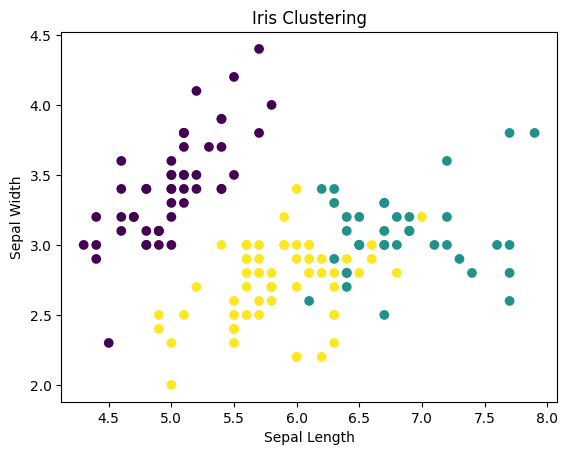

In [9]:
# Visualize the clusters
plt.scatter(iris_data['sepal-length'], iris_data['sepal-width'], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clustering')
plt.show()


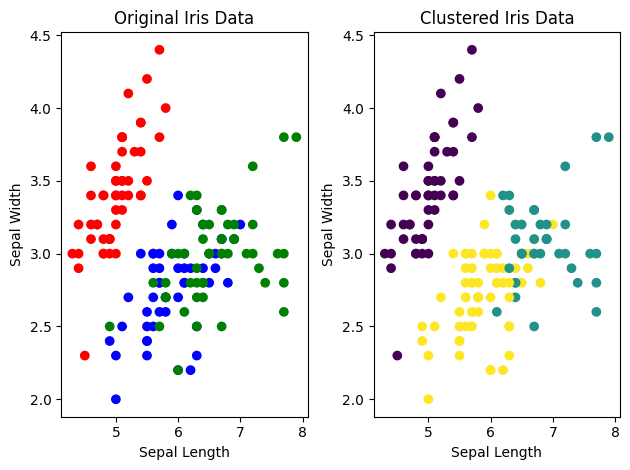

In [10]:

# Plot the original data
plt.subplot(121)
plt.scatter(iris_data['sepal-length'], iris_data['sepal-width'], c=iris_data['class'].map({'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original Iris Data')

# Plot the clustered data
plt.subplot(122)
plt.scatter(iris_data['sepal-length'], iris_data['sepal-width'], c=iris_data['cluster'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustered Iris Data')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Assign predicted labels based on majority class in each cluster
predicted_labels = []
for cluster_id in range(3):
    cluster_data = iris_data[iris_data['cluster'] == cluster_id]
    majority_class = cluster_data['class'].value_counts().idxmax()
    predicted_labels.extend([majority_class] * len(cluster_data))


classification_rep = classification_report(iris_data['class'], predicted_labels)


In [15]:
print(classification_rep)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.19      0.24      0.21        50
 Iris-virginica       0.00      0.00      0.00        50

       accuracy                           0.41       150
      macro avg       0.40      0.41      0.40       150
   weighted avg       0.40      0.41      0.40       150

